In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import qlearning as ql
import seaborn as sns
import thremmorris as tmm

In [2]:
states = np.loadtxt('states.txt', delimiter=',')
controls = np.loadtxt('controls.txt', delimiter=',')
s_a_s = np.loadtxt('s_a_s.txt', delimiter=',')

In [3]:
def grafica(ind_estado_salida, acciones_adm, costos_esperados, ind_estado_llegada, turno_de_juego):
    def format_axes(fig):
        for i, ax in enumerate(fig.axes):
#             ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
            ax.tick_params(labelbottom=False, labelleft=False)

    fig = plt.figure(constrained_layout=True)
    gs = GridSpec(len(acciones_adm), 3, figure=fig)
    
    tablero_salida = tmm.convert_array_board(states[ind_estado_salida, :-1])
    
    
    ax1 = fig.add_subplot(gs[:, 0])
    ax1.imshow(tablero_salida, cmap='PuBuGn')
    
    for i in range(len(acciones_adm)):
        ax2 = fig.add_subplot(gs[i, 1])
        jugada = controls[acciones_adm[i]]
        color = None
        if len(jugada[jugada != 0]) == 1:
            if turno_de_juego == 2:
                color = 'Greens'
            else:
                color = 'Blues'
        else:
            if turno_de_juego == 2:
                color = 'PRGn'
            else:
                color = 'RdBu'
        jugada = tmm.convert_array_board(controls[acciones_adm[i]])
        
        tit = str(costos_esperados[i])
        ax2.set_title(tit)
        
        ax2.imshow(jugada, cmap=color)
    
    ax6 = fig.add_subplot(gs[:,-1])
    tablero_llegada = tmm.convert_array_board(states[ind_estado_llegada, :-1])
    if (tablero_salida == 0).all() and turno_de_juego == 1:
        ax6.imshow(tablero_llegada, cmap='Blues')
    else:
        ax6.imshow(tablero_llegada, cmap='PuBuGn')
   
    fig.suptitle("Acciones admisibles")
    format_axes(fig)

    plt.show()    

In [4]:
def toDo2(tablero):
    ## estado
    arr = np.append(tablero.flatten(), 2)
    ## inidice del estado
    ind_salida = tmm.find_sts(arr)
    ##
    ind_controles = tmm.acc_admisibles(arr)[1]
    Q_value, ctr_value, s_value, q_values = ql.q_learning_parados(arr)

    grafica(ind_salida, ind_controles, q_values, s_value, 2)
    
    return tmm.convert_array_board(states[s_value, :-1])

def toDo1(tablero):
    ## estado
    arr = np.append(tablero.flatten(), 1)
    ## inidice del estado
    ind_salida = tmm.find_sts(arr)
    ##
    ind_controles = tmm.acc_admisibles(arr)[1]
    Q_value, ctr_value, s_value, q_values = ql.q_learning_parauno(arr)
    
    grafica(ind_salida, ind_controles, q_values, s_value, 1)
    
    return tmm.convert_array_board(states[s_value, :-1])

np.savetxt('Qdos.txt', np.zeros(32779), fmt='%i', delimiter=',')

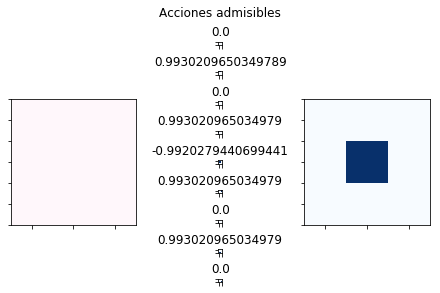

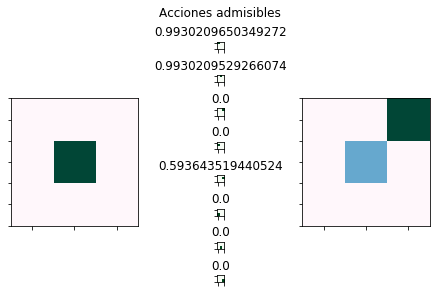

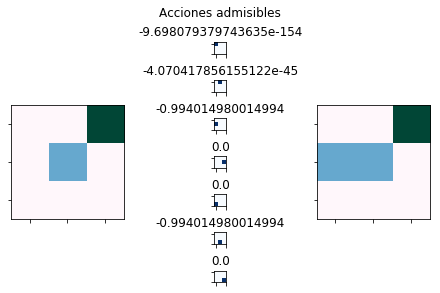

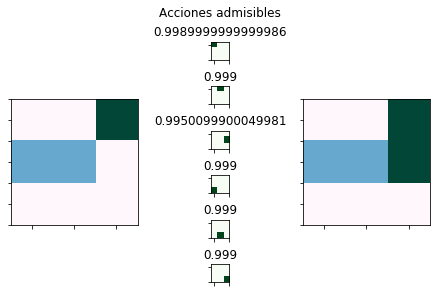

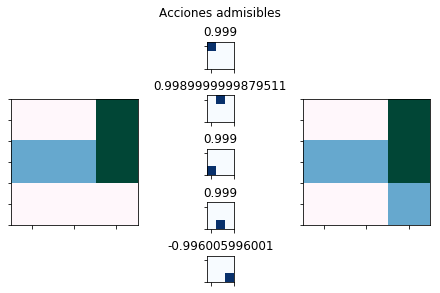

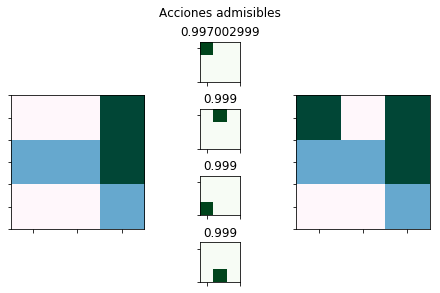

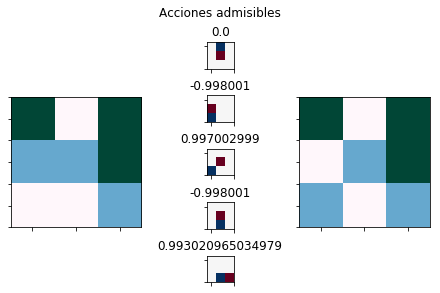

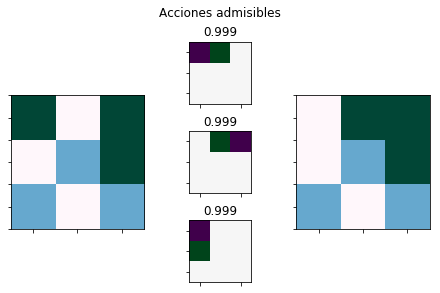

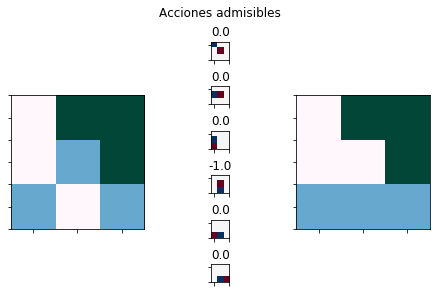

In [7]:
tablero = np.array([[0, 0, 0],
                    [0, 0, 0],
                    [0, 0, 0]]) ## Tablero de juego

turno = 1
is_term = tmm.is_terminal(tablero.flatten())[0]

while not is_term:
    if turno == 1:
        tablero = toDo1(tablero)
        turno = 2
        is_term = tmm.is_terminal(tablero.flatten())[0]
    else:
        tablero = toDo2(tablero)
        turno = 1
        is_term = tmm.is_terminal(tablero.flatten())[0]

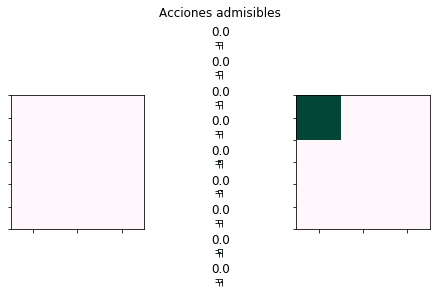

array([[2., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [12]:
tablero = np.array([[0, 0, 0],
                    [0, 0, 0],
                    [0, 0, 0]]) ## Tablero de juego
np.savetxt('Qdos.txt', np.zeros(32779), fmt='%i', delimiter=',')

toDo2(tablero)